### Import

In [1]:

!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime
import sys
from catboost import CatBoostRegressor,Pool
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

In [3]:
from google.colab import drive
from importlib import reload

drive.mount('/content/gdrive',force_remount = True)


Mounted at /content/gdrive


### utils module import

In [4]:
if 'gdrive.MyDrive.utils' not in sys.modules:
  import  gdrive.MyDrive.utils as utils
else:
  print("utils reload")
  reload(utils)

if 'gdrive.MyDrive.data_EDA' not in sys.modules:
  import gdrive.MyDrive.data_EDA as EDA
else:
  print('eda module reload')
  reload(EDA)

version 1


In [5]:
project_name = '소득예측'

### util 설정

In [6]:
utils.seed_everything(311)
utils.set_dir(project_name)

현재 폴더 :  /content/gdrive/MyDrive/data/소득예측
데이터 위치 :  /content/gdrive/MyDrive/data/소득예측/sample_data
submission 위치 :  /content/gdrive/MyDrive/data/소득예측/sample_data


### Load Data

In [7]:
train, test, submission = utils.get_data()
train.head(5)


load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/소득예측/sample_data/sample_submission.csv


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


### 전처리 1
target(income) 분포 바꾸기

In [13]:
import seaborn as sns

In [8]:
train_x = train.drop(columns = ['ID','Income'])
train_y = train['Income']
cat_features = ['Gender','Education_Status','Employment_Status','Working_Week (Yearly)', 'Industry_Status',
                'Occupation_Status','Race','Hispanic_Origin','Martial_Status','Household_Status','Household_Summary',
                'Citizenship','Birth_Country','Birth_Country (Father)', 'Birth_Country (Mother)',"Tax_Status",
                'Losses','Income_Status']

<Axes: xlabel='Income', ylabel='Proportion'>

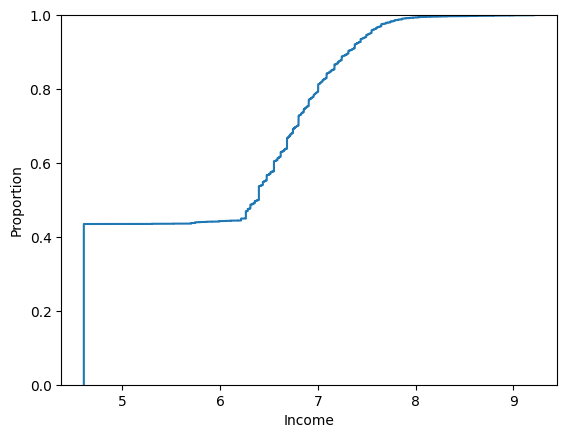

In [20]:
log_y = np.log(train_y+100)
sns.ecdfplot(log_y)

<Axes: xlabel='Income', ylabel='Proportion'>

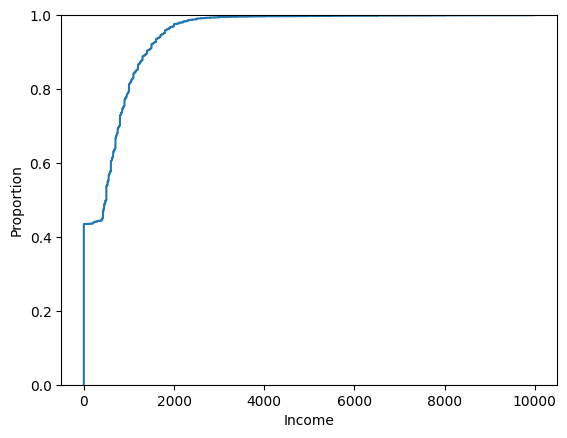

In [16]:
sns.ecdfplot(train_y)

In [ ]:
sns.